In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("file:///Users/eerolaamanen/Downloads/Tieliikenneonnettomuudet%202017/tieliikenneonnettomuudet_2017_hlo.csv", sep=";", encoding="ISO-8859-1")

In [6]:
data.head()

,Onnett_id,Osall_id,Henkilo_id,Osnro,Kulj_matk,Ikä,Sukupuoli,Kortti,Seuraus,Seuraussel,Kulj_kans,Ajokortlk,Ajokortikä
0,8119640,14454817,14384190,1,KU,51.0,M,,0,ei henkilövahinkoa,SF,AB,33.0
1,8119640,14455085,14384406,2,KU,37.0,M,,0,ei henkilövahinkoa,SYR,AB,NaN
2,8119692,14455462,14384755,2,KU,34.0,M,,0,ei henkilövahinkoa,SF,B,6.0
3,8119692,14455904,14385497,1,KU,45.0,N,,0,ei henkilövahinkoa,SF,ABCD1,28.0
4,8120142,14454020,14385557,2,KU,31.0,M,,0,ei henkilövahinkoa,SF,,NaN


Tieliikenneonnettomuudet suhteutettuna sukupuoleen ja ikäluokkiin

In [7]:
datam = data[(data["Sukupuoli"]=="M")]
datan = data[(data["Sukupuoli"]=="N")]

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


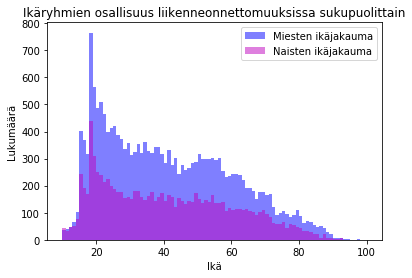

In [8]:
plt.hist(datam.Ikä, range=(10,100), bins=90, alpha=0.5, label=("Miesten ikäjakauma"), color="b")
plt.hist(datan.Ikä, range=(10,100), bins=90, alpha=0.5, label=("Naisten ikäjakauma"), color="m")
plt.legend()
plt.title("Ikäryhmien osallisuus liikenneonnettomuuksissa sukupuolittain")
plt.xlabel("Ikä")
plt.ylabel("Lukumäärä")
plt.show()

Tieliikenneonnettomuudet ajoneuvo- ja ikäluokittain

In [9]:
#dataa = data[(data["Ajokortlk"].str.contains("A"))]
#datab = data[(data["Ajokortlk"].str.contains("B"))]
dataa = data[(data["Ajokortlk"].str.contains("A"))]
datab = data[(data["Ajokortlk"].str.contains("B"))]

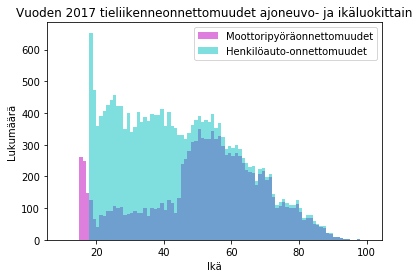

In [10]:
plt.hist(dataa.Ikä, range=(10,100), bins=90, alpha=0.5, color="m", label=("Moottoripyöräonnettomuudet"))
plt.hist(datab.Ikä, range=(10,100), bins=90, alpha=0.5, color="c", label=("Henkilöauto-onnettomuudet"))
plt.title("Vuoden 2017 tieliikenneonnettomuudet ajoneuvo- ja ikäluokittain")
plt.xlabel("Ikä")
plt.ylabel("Lukumäärä")
plt.legend()
plt.show()

Tieliikenneonnettomuuksien seuraukset

In [11]:
data0 = data.replace(np.NaN,0)


In [12]:
Kuollut = data0[(data0["Seuraussel"]=="kuollut")]
Ei_vahinkoa = data0[(data0["Seuraussel"]=="ei henkilövahinkoa")]
Loukkaantunut = data0[(data0["Seuraussel"]=="loukkaantunut")]
Ei_tietoa = data0[(data0["Seuraussel"]==0)]

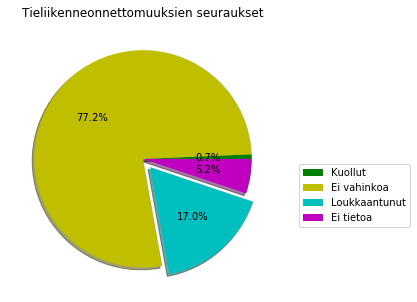

In [22]:
plt.figure(figsize=(5,5))
labels=['Kuollut', 'Ei vahinkoa', 'Loukkaantunut', 'Ei tietoa']
sizes=[len(Kuollut)/len(data0), len(Ei_vahinkoa)/len(data0), len(Loukkaantunut)/len(data0), len(Ei_tietoa)/len(data0),]
colors=['g', 'y', 'c', 'm']
explode = (0, 0, 0.1, 0)
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.1f%%', shadow=True)
plt.title("Tieliikenneonnettomuuksien seuraukset")
plt.legend(labels=labels, bbox_to_anchor=(1.5,0.5))
plt.show()

Tieliikenneonnettomuudessa ollut osallinen

In [14]:
Kuljettaja=data0[(data0["Kulj_matk"]=="KU")]
Matkustaja=data0[(data0["Kulj_matk"]=="MA")]
Jalankulkija=data0[(data0["Kulj_matk"]=="JK")]
Ei_dataa=data0[(data0["Kulj_matk"]=="XX")]

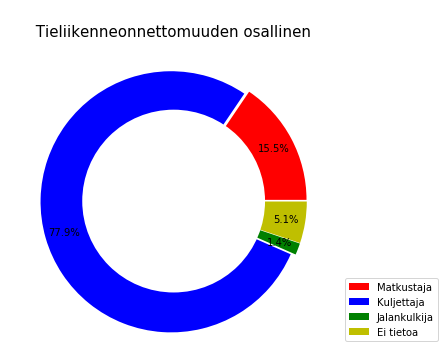

In [29]:
plt.figure(figsize=(5,5))
labels=['Matkustaja','Kuljettaja', 'Jalankulkija', 'Ei tietoa']
sizes=[len(Matkustaja)/len(data0), len(Kuljettaja)/len(data0), len(Jalankulkija)/len(data0), len(Ei_dataa)/len(data0)]
colors=['r', 'b', 'g', 'y']
explode = (0.02, 0.02, 0.02, 0.02)
plt.pie(sizes, explode=explode, colors=colors,autopct="%1.1f%%", pctdistance=0.85)
plt.title("\n Tieliikenneonnettomuuden osallinen \n", fontsize=15)
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(1,0.25))
plt.show()

Kuolemaan johtaneiden onnettomuuksien lukusuhteet 

HYVÄ VERSIO!

In [18]:
KJK=pd.merge(Kuollut,Jalankulkija)
KMA=pd.merge(Kuollut,Matkustaja)
KKU=pd.merge(Kuollut,Kuljettaja)

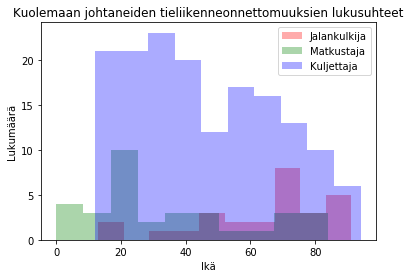

In [19]:
plt.hist(KJK.Ikä, alpha=0.33, label=("Jalankulkija"), color="r")
plt.hist(KMA.Ikä, alpha=0.33, label=("Matkustaja"), color="g")
plt.hist(KKU.Ikä, alpha=0.33, label=("Kuljettaja"), color="b")
plt.legend()
plt.title("Kuolemaan johtaneiden tieliikenneonnettomuuksien lukusuhteet")
plt.xlabel("Ikä")
plt.ylabel("Lukumäärä")
plt.show()

HUONO VERSIO!!

In [20]:
JK=Kuollut+Jalankulkija
KU=Kuollut+Kuljettaja
MA=Matkustaja+Kuollut

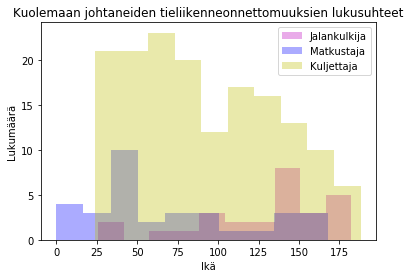

In [21]:
plt.hist(JK.Ikä, alpha=0.33, label=("Jalankulkija"), color="m")
plt.hist(MA.Ikä, alpha=0.33, label=("Matkustaja"), color="b")
plt.hist(KU.Ikä, alpha=0.33, label=("Kuljettaja"), color="y")
plt.legend()
plt.title("Kuolemaan johtaneiden tieliikenneonnettomuuksien lukusuhteet")
plt.xlabel("Ikä")
plt.ylabel("Lukumäärä")
plt.show()